In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

In [25]:
X_train = np.load('data/X_train_regression1.npy')
X_train_df = pd.DataFrame(X_train)
Y_train = np.load('data/y_train_regression1.npy')
Y_train_df = pd.DataFrame(Y_train)
X_test = np.load('data/X_test_regression1.npy')
X_test_df = pd.DataFrame(X_test)

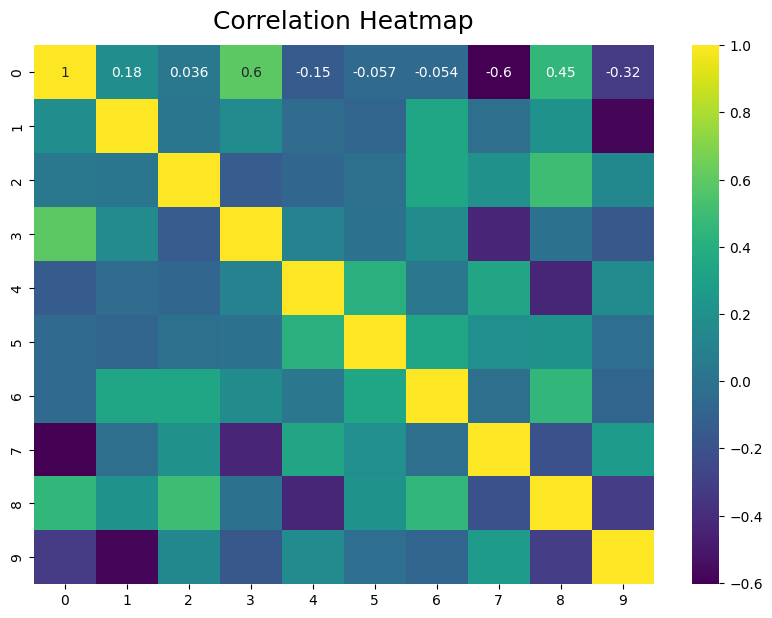

In [38]:
f = plt.figure(figsize=(10, 7))
X_train_Matrix = X_train_df.corr() 
heatmap = sns.heatmap(X_train_Matrix, annot=True, cmap="viridis") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [41]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

Feature 0: 0.386178
Feature 1: 4.036347
Feature 2: 2.897527
Feature 3: 1.352134
Feature 4: 1.120926
Feature 5: 8.329494
Feature 6: 0.001137
Feature 7: 1.949557
Feature 8: 0.480275
Feature 9: 3.329743


/home/mserrao/dd/ml/project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


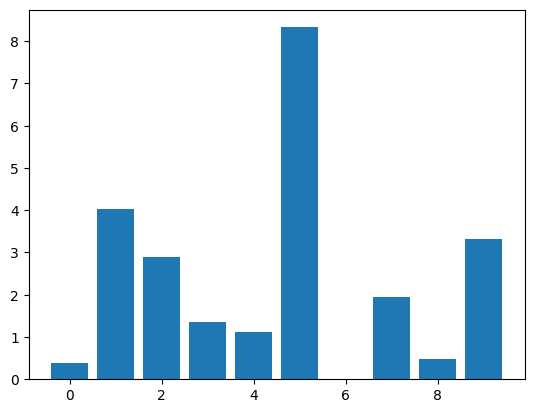

In [43]:
X_train_fs, X_test_fs, fs = select_features(X_train_df, Y_train_df, X_test_df)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()